In [1]:
!ls

AgeExposure-CSLiteracy-For-All-Students.ipynb
Dual-Axis-Box-Plots
HeatMaps
Priyank-DDFG-Code.ipynb
Priyank-Ethinic-Groups-Profiling-Reports
data


In [2]:
#All ap scores dataframe
import pandas as pd
ap_all = pd.read_excel('data/Allstudents/ap_performance_allstudents.xlsx')
ap_all.columns = ap_all.iloc[0]
ap_all= ap_all[1:]
ap_all.head(17)

,District Name,District Code,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5
1,Abington,00010000,28,2,3,7,12,4,17.9,82.1
2,Academy Of the Pacific Rim Charter Public (Dis...,04120000,18,10,6,2,0,0,88.9,11.1
3,Acton-Boxborough,06000000,319,5,14,14,63,223,6.0,94.0
4,Advanced Math and Science Academy Charter (Dis...,04300000,154,7,14,32,39,62,13.6,86.4
5,Agawam,00050000,37,8,11,13,5,0,51.4,48.6
6,Amesbury,00070000,30,6,8,6,5,5,46.7,53.3
7,Amherst-Pelham,06050000,85,0,12,32,21,20,14.1,85.9
8,Andover,00090000,147,0,3,25,47,72,2.0,98.0
9,Arlington,00100000,267,6,39,66,69,87,16.9,83.1
10,Ashburnham-Westminster,06100000,20,8,6,5,1,0,70.0,30.0


In [3]:
## Filling Missing Values with 0's Since No distinction between NaN and 0's already in the data because too many NaN's
ap_all_filled = ap_all.fillna(0)
ap_all_filled.head(17)

,District Name,District Code,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5
1,Abington,00010000,28,2,3,7,12,4,17.9,82.1
2,Academy Of the Pacific Rim Charter Public (Dis...,04120000,18,10,6,2,0,0,88.9,11.1
3,Acton-Boxborough,06000000,319,5,14,14,63,223,6.0,94.0
4,Advanced Math and Science Academy Charter (Dis...,04300000,154,7,14,32,39,62,13.6,86.4
5,Agawam,00050000,37,8,11,13,5,0,51.4,48.6
6,Amesbury,00070000,30,6,8,6,5,5,46.7,53.3
7,Amherst-Pelham,06050000,85,0,12,32,21,20,14.1,85.9
8,Andover,00090000,147,0,3,25,47,72,2.0,98.0
9,Arlington,00100000,267,6,39,66,69,87,16.9,83.1
10,Ashburnham-Westminster,06100000,20,8,6,5,1,0,70.0,30.0


In [4]:
import numpy as np
numeric_columns = ['Score=3', 'Score=4','Score=5']
ap_all_filled[numeric_columns] = ap_all_filled[numeric_columns].replace(',', '', regex=True)
ap_all_filled[numeric_columns] = ap_all_filled[numeric_columns].fillna(0)

#Creating Sum
ap_all_filled[numeric_columns] = ap_all_filled[numeric_columns].apply(lambda x: x.str.strip().fillna(np.nan).astype(float).fillna(0).astype(int))

#Adding Sum of Passing Scores per Row
row_sums = ap_all_filled[numeric_columns].sum(axis=1)
ap_all_filled['Sum']= row_sums


ap_all_filled



,District Name,District Code,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum
1,Abington,00010000,28,2,3,7,12,4,17.9,82.1,23
2,Academy Of the Pacific Rim Charter Public (Dis...,04120000,18,10,6,2,0,0,88.9,11.1,2
3,Acton-Boxborough,06000000,319,5,14,14,63,223,6.0,94.0,300
4,Advanced Math and Science Academy Charter (Dis...,04300000,154,7,14,32,39,62,13.6,86.4,133
5,Agawam,00050000,37,8,11,13,5,0,51.4,48.6,18
...,...,...,...,...,...,...,...,...,...,...,...
277,Winchester,03440000,271,7,17,49,82,116,8.9,91.1,247
278,Winthrop,03460000,72,32,17,12,8,3,68.1,31.9,23
279,Woburn,03470000,51,13,15,9,9,5,54.9,45.1,23
280,Worcester,03480000,462,179,108,96,50,29,62.1,37.9,175


In [6]:
# Reading the number of people taking computer classes for each grade level per each district
pf = pd.read_excel('data/Allstudents/artcourse-all-students.xlsx')
#Removes unecessary row
pf.columns = pf.iloc[0]
pf= pf[1:]
pf

,District Name,District Code,K,01,02,03,04,05,06,07,08,09,10,11,12,All Grades,Total Students
1,Abby Kelley Foster Charter Public (District),04450000,0,0,0,0,120,123,120,110,42,63,0,14,20,612,"1,421"
2,Abington,00010000,0,0,0,0,0,0,0,173,158,0,0,0,0,331,"2,109"
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,497
4,Acton-Boxborough,06000000,0,0,0,0,0,0,0,386,405,20,14,3,2,830,"5,124"
5,Acushnet,00030000,78,102,86,119,100,80,112,104,99,NaN,NaN,NaN,NaN,880,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woburn,03470000,0,0,0,0,0,0,238,317,254,25,7,2,2,845,"4,206"
396,Worcester,03480000,0,0,0,0,0,0,0,490,238,2,91,95,40,956,"23,159"
397,Worthington,03490000,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,55
398,Wrentham,03500000,132,123,108,108,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,471,855


In [7]:
#filling in NaN values with 0's
pf_filled = pf.fillna(0)
pf_filled.head(17)

,District Name,District Code,K,01,02,03,04,05,06,07,08,09,10,11,12,All Grades,Total Students
1,Abby Kelley Foster Charter Public (District),04450000,0,0,0,0,120,123,120,110,42,63,0,14,20,612,"1,421"
2,Abington,00010000,0,0,0,0,0,0,0,173,158,0,0,0,0,331,"2,109"
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,497
4,Acton-Boxborough,06000000,0,0,0,0,0,0,0,386,405,20,14,3,2,830,"5,124"
5,Acushnet,00030000,78,102,86,119,100,80,112,104,99,0,0,0,0,880,880
6,Advanced Math and Science Academy Charter (Dis...,04300000,0,0,0,0,0,0,138,0,128,45,21,16,22,370,966
7,Agawam,00050000,0,0,0,0,0,282,250,217,283,8,3,1,7,"1,051","3,367"
8,Alma del Mar Charter School (District),04090000,0,0,0,52,53,51,147,133,89,0,0,0,0,525,938
9,Amesbury,00070000,0,139,123,111,128,136,2,91,147,21,9,17,23,947,"1,763"
10,Amherst,00080000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,979


In [8]:
# Creates the percentage column of amount of students taking computer clases/total students per district
pf_filled['Percentages'] = pf_filled['All Grades'].str.replace(',','').str.strip().astype('int')/pf_filled['Total Students'].str.replace(',','').str.strip().astype('int')
pf_filled

,District Name,District Code,K,01,02,03,04,05,06,07,08,09,10,11,12,All Grades,Total Students,Percentages
1,Abby Kelley Foster Charter Public (District),04450000,0,0,0,0,120,123,120,110,42,63,0,14,20,612,"1,421",0.430683
2,Abington,00010000,0,0,0,0,0,0,0,173,158,0,0,0,0,331,"2,109",0.156946
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,497,0.000000
4,Acton-Boxborough,06000000,0,0,0,0,0,0,0,386,405,20,14,3,2,830,"5,124",0.161983
5,Acushnet,00030000,78,102,86,119,100,80,112,104,99,0,0,0,0,880,880,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woburn,03470000,0,0,0,0,0,0,238,317,254,25,7,2,2,845,"4,206",0.200903
396,Worcester,03480000,0,0,0,0,0,0,0,490,238,2,91,95,40,956,"23,159",0.041280
397,Worthington,03490000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,0.000000
398,Wrentham,03500000,132,123,108,108,0,0,0,0,0,0,0,0,0,471,855,0.550877


In [9]:
# Merging overall CS Literacy percentages with passing AP score percentages
overall_merged_df = pd.DataFrame(pf_filled.merge(ap_all_filled, on = 'District Code', how = "inner"))
overall_merged_df


,District Name_x,District Code,K,01,02,03,04,05,06,07,...,District Name_y,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum
0,Abington,00010000,0,0,0,0,0,0,0,173,...,Abington,28,2,3,7,12,4,17.9,82.1,23
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,0,0,0,...,Academy Of the Pacific Rim Charter Public (Dis...,18,10,6,2,0,0,88.9,11.1,2
2,Acton-Boxborough,06000000,0,0,0,0,0,0,0,386,...,Acton-Boxborough,319,5,14,14,63,223,6.0,94.0,300
3,Advanced Math and Science Academy Charter (Dis...,04300000,0,0,0,0,0,0,138,0,...,Advanced Math and Science Academy Charter (Dis...,154,7,14,32,39,62,13.6,86.4,133
4,Agawam,00050000,0,0,0,0,0,282,250,217,...,Agawam,37,8,11,13,5,0,51.4,48.6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Winchester,03440000,0,0,0,0,0,0,0,0,...,Winchester,271,7,17,49,82,116,8.9,91.1,247
277,Winthrop,03460000,149,144,162,141,119,144,0,0,...,Winthrop,72,32,17,12,8,3,68.1,31.9,23
278,Woburn,03470000,0,0,0,0,0,0,238,317,...,Woburn,51,13,15,9,9,5,54.9,45.1,23
279,Worcester,03480000,0,0,0,0,0,0,0,490,...,Worcester,462,179,108,96,50,29,62.1,37.9,175


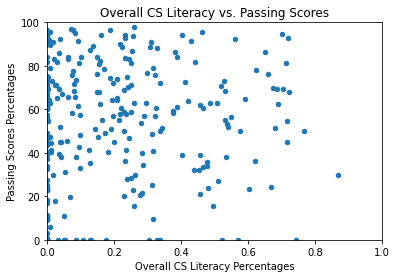

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Convert '% Score 3-5' column to float
overall_merged_df['% Score 3-5'] = overall_merged_df['% Score 3-5'].astype(float)
overall_merged_df['Percentages'] = overall_merged_df['Percentages'].astype(float)

# Create the scatter plot
overall_merged_df.plot.scatter(x='Percentages', y='% Score 3-5')
plt.xlabel('Overall CS Literacy Percentages')
plt.ylabel('Passing Scores Percentages')
plt.title('Overall CS Literacy vs. Passing Scores')
plt.xlim(0, 1)  # Set the x-axis limits
plt.ylim(0, 100)   # Set the y-axis limits

# Display the plot
plt.show()

In [11]:
#K-3 grades table
import numpy as np
em_df = pf_filled.drop(columns=['04', '05', '06','07','08','09','10','11','12','All Grades', 'Total Students','Percentages'])

numeric_columns = ['K', '01','02','03']
em_df[numeric_columns] = em_df[numeric_columns].replace(',', '', regex=True)
em_df[numeric_columns] = em_df[numeric_columns].fillna(0)

#Finds the sum of K-3 students taking computer classes for each district
em_df[numeric_columns] = em_df[numeric_columns].apply(lambda x: x.str.strip().fillna(np.nan).astype(float).fillna(0).astype(int))

#Creates a new column for the sum
row_sums = em_df[numeric_columns].sum(axis=1)
em_df['Sum']= row_sums


em_df

,District Name,District Code,K,01,02,03,Sum
1,Abby Kelley Foster Charter Public (District),04450000,0,0,0,0,0
2,Abington,00010000,0,0,0,0,0
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0
4,Acton-Boxborough,06000000,0,0,0,0,0
5,Acushnet,00030000,78,102,86,119,385
...,...,...,...,...,...,...,...
395,Woburn,03470000,0,0,0,0,0
396,Worcester,03480000,0,0,0,0,0
397,Worthington,03490000,0,0,0,0,0
398,Wrentham,03500000,132,123,108,108,471


In [12]:
#4-8 grades table
ms_df = pf_filled.drop(columns = ['K','01','02','03','09','10','11','12','All Grades', 'Total Students','Percentages'])
numeric_columns = ['04', '05','06','07','08']
ms_df[numeric_columns] = ms_df[numeric_columns].replace(',', '', regex=True)
ms_df[numeric_columns] = ms_df[numeric_columns].fillna(0)

#Finds the sum of 4-8 students taking computer classes for each district
ms_df[numeric_columns] = ms_df[numeric_columns].apply(lambda x: x.str.strip().fillna(np.nan).astype(float).fillna(0).astype(int))

#Creates new column for the sum
row_sums = ms_df[numeric_columns].sum(axis=1)
ms_df['Sum']= row_sums

ms_df

,District Name,District Code,04,05,06,07,08,Sum
1,Abby Kelley Foster Charter Public (District),04450000,120,123,120,110,42,515
2,Abington,00010000,0,0,0,173,158,331
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,0
4,Acton-Boxborough,06000000,0,0,0,386,405,791
5,Acushnet,00030000,100,80,112,104,99,495
...,...,...,...,...,...,...,...,...
395,Woburn,03470000,0,0,238,317,254,809
396,Worcester,03480000,0,0,0,490,238,728
397,Worthington,03490000,0,0,0,0,0,0
398,Wrentham,03500000,0,0,0,0,0,0


In [13]:
#9-12 grades table
hs_df = pf_filled.drop(columns = ['K','01','02','03','04', '05', '06','07','08','All Grades', 'Total Students','Percentages'])
numeric_columns = ['09', '10','11','12']
hs_df[numeric_columns] = hs_df[numeric_columns].replace(',', '', regex=True)
hs_df[numeric_columns] = hs_df[numeric_columns].fillna(0)

#Finds the sum of 9-12 students taking computer classes for each district
hs_df[numeric_columns] = hs_df[numeric_columns].apply(lambda x: x.str.strip().fillna(np.nan).astype(float).fillna(0).astype(int))

#Creates new column for the sum
row_sums = hs_df[numeric_columns].sum(axis=1)
hs_df['Sum']= row_sums


hs_df

,District Name,District Code,09,10,11,12,Sum
1,Abby Kelley Foster Charter Public (District),04450000,63,0,14,20,97
2,Abington,00010000,0,0,0,0,0
3,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0
4,Acton-Boxborough,06000000,20,14,3,2,39
5,Acushnet,00030000,0,0,0,0,0
...,...,...,...,...,...,...,...
395,Woburn,03470000,25,7,2,2,36
396,Worcester,03480000,2,91,95,40,228
397,Worthington,03490000,0,0,0,0,0
398,Wrentham,03500000,0,0,0,0,0


In [14]:
# Base code for merging
merged_df = pd.DataFrame(pf_filled.merge(ap_all, on = 'District Code', how = "inner"))


# Merge the datasets based on a common column
#merged_df = pd.merge(pf_filled, ap_all, on='District Code', how='inner')

# Remove rows that don't have a duplicate
#merged_df = merged_df[merged_df.duplicated(subset='District Code', keep=False)]

# Print the merged and filtered dataset
print(merged_df[(merged_df['District Name_y'].isnull())])



Empty DataFrame
Columns: [District Name_x, District Code, K, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, All Grades, Total Students, Percentages, District Name_y, Tests Taken, Score=1, Score=2, Score=3, Score=4, Score=5, % Score 1-2, % Score 3-5]
Index: []

[0 rows x 27 columns]


In [15]:
#Grades K-3 merge with AP Tests
em_merged_df = pd.DataFrame(em_df.merge(ap_all_filled, on = 'District Code', how = "inner"))
em_merged_df


,District Name_x,District Code,K,01,02,03,Sum_x,District Name_y,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum_y
0,Abington,00010000,0,0,0,0,0,Abington,28,2,3,7,12,4,17.9,82.1,23
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,Academy Of the Pacific Rim Charter Public (Dis...,18,10,6,2,0,0,88.9,11.1,2
2,Acton-Boxborough,06000000,0,0,0,0,0,Acton-Boxborough,319,5,14,14,63,223,6.0,94.0,300
3,Advanced Math and Science Academy Charter (Dis...,04300000,0,0,0,0,0,Advanced Math and Science Academy Charter (Dis...,154,7,14,32,39,62,13.6,86.4,133
4,Agawam,00050000,0,0,0,0,0,Agawam,37,8,11,13,5,0,51.4,48.6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Winchester,03440000,0,0,0,0,0,Winchester,271,7,17,49,82,116,8.9,91.1,247
277,Winthrop,03460000,149,144,162,141,596,Winthrop,72,32,17,12,8,3,68.1,31.9,23
278,Woburn,03470000,0,0,0,0,0,Woburn,51,13,15,9,9,5,54.9,45.1,23
279,Worcester,03480000,0,0,0,0,0,Worcester,462,179,108,96,50,29,62.1,37.9,175


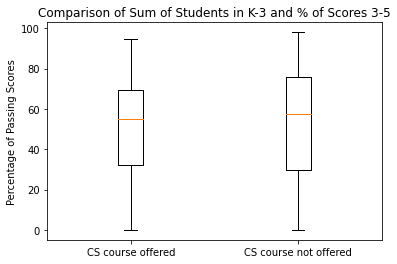

In [16]:
#Boxplot for Comparison for K-3
import matplotlib.pyplot as plt
#Turn '% Score 3-5' column into float
em_merged_df['% Score 3-5'] = em_merged_df['% Score 3-5'].astype(float)

#Setting up to filter for >0 or 0
em_merged_df['CS course offered at any point K-12'] = em_merged_df['Sum_x'].apply(lambda x: 1 if x > 0 else 0)

# Filter the data for the two variables
data_cs_course_offered = em_merged_df[em_merged_df['CS course offered at any point K-12'] == 1]
data_cs_course_not_offered = em_merged_df[em_merged_df['CS course offered at any point K-12'] == 0]

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
boxplot_data = [data_cs_course_offered['% Score 3-5'], data_cs_course_not_offered['% Score 3-5']]
ax.boxplot(boxplot_data, labels=['CS course offered', 'CS course not offered'])

# Set the y-axis label
ax.set_ylabel('Percentage of Passing Scores')

# Set the title
plt.title('Comparison of Sum of Students in K-3 and % of Scores 3-5')

# Show the plot
plt.show()

In [17]:
#Grades 4-8 merge with AP Tests
ms_merged_df = pd.DataFrame(ms_df.merge(ap_all_filled, on = 'District Code', how = "inner"))
ms_merged_df

,District Name_x,District Code,04,05,06,07,08,Sum_x,District Name_y,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum_y
0,Abington,00010000,0,0,0,173,158,331,Abington,28,2,3,7,12,4,17.9,82.1,23
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,0,Academy Of the Pacific Rim Charter Public (Dis...,18,10,6,2,0,0,88.9,11.1,2
2,Acton-Boxborough,06000000,0,0,0,386,405,791,Acton-Boxborough,319,5,14,14,63,223,6.0,94.0,300
3,Advanced Math and Science Academy Charter (Dis...,04300000,0,0,138,0,128,266,Advanced Math and Science Academy Charter (Dis...,154,7,14,32,39,62,13.6,86.4,133
4,Agawam,00050000,0,282,250,217,283,1032,Agawam,37,8,11,13,5,0,51.4,48.6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Winchester,03440000,0,0,0,0,0,0,Winchester,271,7,17,49,82,116,8.9,91.1,247
277,Winthrop,03460000,119,144,0,0,0,263,Winthrop,72,32,17,12,8,3,68.1,31.9,23
278,Woburn,03470000,0,0,238,317,254,809,Woburn,51,13,15,9,9,5,54.9,45.1,23
279,Worcester,03480000,0,0,0,490,238,728,Worcester,462,179,108,96,50,29,62.1,37.9,175


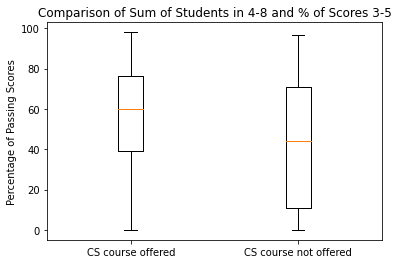

In [19]:
#Boxplot for comparison of 4-8
ms_merged_df['% Score 3-5'] = ms_merged_df['% Score 3-5'].astype(float)

#Setting up to filter for >0 or 0
ms_merged_df['CS course offered at any point K-12'] = ms_merged_df['Sum_x'].apply(lambda x: 1 if x > 0 else 0)

# Filter the data for the two variables
data_cs_course_offered = ms_merged_df[ms_merged_df['CS course offered at any point K-12'] == 1]
data_cs_course_not_offered = ms_merged_df[ms_merged_df['CS course offered at any point K-12'] == 0]

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
boxplot_data = [data_cs_course_offered['% Score 3-5'], data_cs_course_not_offered['% Score 3-5']]
ax.boxplot(boxplot_data, labels=['CS course offered', 'CS course not offered'])

# Set the y-axis label
ax.set_ylabel('Percentage of Passing Scores')

# Set the title
plt.title('Comparison of Sum of Students in 4-8 and % of Scores 3-5')

# Show the plot
plt.show()

In [20]:
# Grades 9-12 merge with AP Tests
hs_merged_df = pd.DataFrame(hs_df.merge(ap_all_filled, on = 'District Code', how = "inner"))
hs_merged_df

,District Name_x,District Code,09,10,11,12,Sum_x,District Name_y,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum_y
0,Abington,00010000,0,0,0,0,0,Abington,28,2,3,7,12,4,17.9,82.1,23
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,Academy Of the Pacific Rim Charter Public (Dis...,18,10,6,2,0,0,88.9,11.1,2
2,Acton-Boxborough,06000000,20,14,3,2,39,Acton-Boxborough,319,5,14,14,63,223,6.0,94.0,300
3,Advanced Math and Science Academy Charter (Dis...,04300000,45,21,16,22,104,Advanced Math and Science Academy Charter (Dis...,154,7,14,32,39,62,13.6,86.4,133
4,Agawam,00050000,8,3,1,7,19,Agawam,37,8,11,13,5,0,51.4,48.6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Winchester,03440000,16,25,29,12,82,Winchester,271,7,17,49,82,116,8.9,91.1,247
277,Winthrop,03460000,0,0,0,0,0,Winthrop,72,32,17,12,8,3,68.1,31.9,23
278,Woburn,03470000,25,7,2,2,36,Woburn,51,13,15,9,9,5,54.9,45.1,23
279,Worcester,03480000,2,91,95,40,228,Worcester,462,179,108,96,50,29,62.1,37.9,175


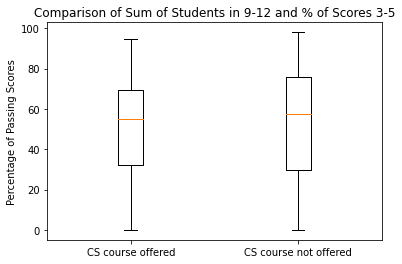

In [21]:
#Boxplot for Comparison for 9-12
hs_merged_df['% Score 3-5'] = hs_merged_df['% Score 3-5'].astype(float)

#Setting up to filter for >0 or 0
hs_merged_df['CS course offered at any point K-12'] = hs_merged_df['Sum_x'].apply(lambda x: 1 if x > 0 else 0)

# Filter the data for the two variables
data_cs_course_offered = hs_merged_df[em_merged_df['CS course offered at any point K-12'] == 1]
data_cs_course_not_offered = hs_merged_df[em_merged_df['CS course offered at any point K-12'] == 0]

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
boxplot_data = [data_cs_course_offered['% Score 3-5'], data_cs_course_not_offered['% Score 3-5']]
ax.boxplot(boxplot_data, labels=['CS course offered', 'CS course not offered'])

# Set the y-axis label
ax.set_ylabel('Percentage of Passing Scores')

# Set the title
plt.title('Comparison of Sum of Students in 9-12 and % of Scores 3-5')

# Show the plot
plt.show()

In [22]:
#Merges three data frames (K-3, 4-8, and 9-12)
new_merged_df = pd.merge(em_merged_df, ms_merged_df, on='District Code', how='inner')
new2_merged_df = pd.merge(new_merged_df, hs_merged_df, on='District Code', how='inner')

#Renames sum columns for each category (K-3, 4-8, 9-12)
new2_merged_df.rename(columns={'Sum_x_x': 'K-3 Sum'}, inplace = True)
new2_merged_df.rename(columns={'Sum_x_y': '4-8 Sum'}, inplace = True)
new2_merged_df.rename(columns={'Sum_x': '9-12 Sum'}, inplace = True)


new2_merged_df

,District Name_x_x,District Code,K,01,02,03,K-3 Sum,District Name_y_x,Tests Taken_x,Score=1_x,...,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,% Score 1-2,% Score 3-5,Sum_y,CS course offered at any point K-12
0,Abington,00010000,0,0,0,0,0,Abington,28,2,...,28,2,3,7,12,4,17.9,82.1,23,0
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,0,0,0,0,0,Academy Of the Pacific Rim Charter Public (Dis...,18,10,...,18,10,6,2,0,0,88.9,11.1,2,0
2,Acton-Boxborough,06000000,0,0,0,0,0,Acton-Boxborough,319,5,...,319,5,14,14,63,223,6.0,94.0,300,1
3,Advanced Math and Science Academy Charter (Dis...,04300000,0,0,0,0,0,Advanced Math and Science Academy Charter (Dis...,154,7,...,154,7,14,32,39,62,13.6,86.4,133,1
4,Agawam,00050000,0,0,0,0,0,Agawam,37,8,...,37,8,11,13,5,0,51.4,48.6,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Winchester,03440000,0,0,0,0,0,Winchester,271,7,...,271,7,17,49,82,116,8.9,91.1,247,1
277,Winthrop,03460000,149,144,162,141,596,Winthrop,72,32,...,72,32,17,12,8,3,68.1,31.9,23,0
278,Woburn,03470000,0,0,0,0,0,Woburn,51,13,...,51,13,15,9,9,5,54.9,45.1,23,1
279,Worcester,03480000,0,0,0,0,0,Worcester,462,179,...,462,179,108,96,50,29,62.1,37.9,175,1


In [23]:
#Top 40 districts
high_pf = pf_filled.sort_values('Percentages', ascending= False)
new_high = high_pf[0:41]
new_high

,District Name,District Code,K,01,02,03,04,05,06,07,08,09,10,11,12,All Grades,Total Students,Percentages
269,Orleans,02240000,30,18,21,28,29,38,0,0,0,0,0,0,0,164,164,1.000000
107,Erving,00910000,19,17,17,14,11,14,21,0,0,0,0,0,0,113,113,1.000000
344,Sunderland,02890000,19,13,24,27,25,27,33,0,0,0,0,0,0,168,168,1.000000
142,Halifax,01180000,68,75,66,82,95,104,77,0,0,0,0,0,0,567,567,1.000000
48,Boxford,00380000,97,108,106,92,96,99,111,0,0,0,0,0,0,709,709,1.000000
50,Brewster,00410000,63,64,70,70,58,85,0,0,0,0,0,0,0,410,410,1.000000
382,Westhampton,03270000,14,9,13,14,11,20,17,0,0,0,0,0,0,98,98,1.000000
148,Hancock,01210000,5,9,8,6,5,6,4,0,0,0,0,0,0,43,43,1.000000
356,Truro,03000000,17,12,12,15,15,16,0,0,0,0,0,0,0,87,87,1.000000
387,Whately,03370000,14,17,18,16,14,16,12,0,0,0,0,0,0,107,107,1.000000


In [24]:
#Low 40 districts
low_pf = pf_filled.sort_values('Percentages', ascending= True)
new_low = low_pf[0:41]
new_low

,District Name,District Code,K,01,02,03,04,05,06,07,08,09,10,11,12,All Grades,Total Students,Percentages
200,Map Academy Charter School (District),35170000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,0.0
325,South Middlesex Regional Vocational Technical,08290000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,828,0.0
287,Plainville,02380000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,592,0.0
285,Pioneer Valley Performing Arts Charter Public ...,04790000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,404,0.0
284,Pioneer Valley Chinese Immersion Charter (Dist...,04970000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,553,0.0
326,South Shore Charter Public (District),04880000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,037",0.0
97,Dudley Street Neighborhood Charter School (Dis...,04070000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,0.0
170,KIPP Academy Boston Charter School (District),04630000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,611,0.0
327,South Shore Regional Vocational Technical,08730000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,646,0.0
328,Southampton,02750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,427,0.0


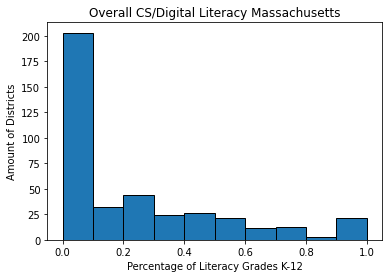

In [25]:
#Overall CS Literacy Histogram visualization
plt.hist(pf_filled['Percentages'], bins=10, edgecolor='black')
plt.xlabel('Percentage of Literacy Grades K-12')
plt.ylabel('Amount of Districts')
plt.title('Overall CS/Digital Literacy Massachusetts')

# Display the plot
plt.show()